# Trading Strategies

Import libraries and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Modules.Payoff as Payoff
import Modules.Stock as Stock
import Modules.BinomialModel as BinomialModel
import Modules.BlackScholes as BlackScholes

Choose which pricing model to use to calculate option price

In [2]:
PRICING_MODEL = "BlackScholes"
N = 10

def option(option_type, asset_price, strike, T, rf, vol, n=1):
    if PRICING_MODEL == "BinomialModel":
        return BinomialModel.Option(option_type, asset_price, strike, T, rf, vol, n)
    elif PRICING_MODEL == "BlackScholes":
        return BlackScholes.Option(option_type, asset_price, strike, T, rf, sigma=vol)

## Payoff for selected strategies

In [3]:
CURRENT_PRICE = 100
VOL = 0.2
RF = 0.05
T = 5
N = 10

### Long Straddle

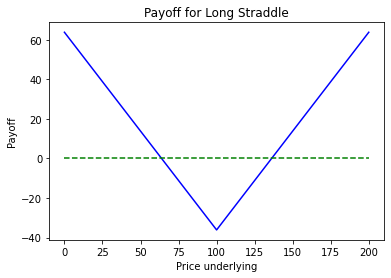

''

In [4]:
call = option("call", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
put = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
Payoff.show_payoff("Long Straddle", [call, put])

### Covered Call

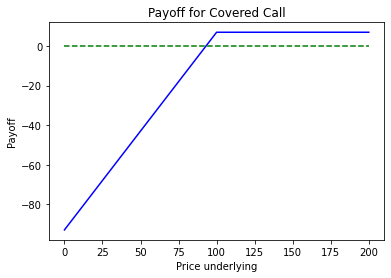

''

In [5]:
synthetic_stock_call = option("call", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
synthetic_stock_put = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
call = option("call", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
Payoff.show_payoff("Covered Call", [synthetic_stock_call, -synthetic_stock_put, -call])    

### Bear Put Spread

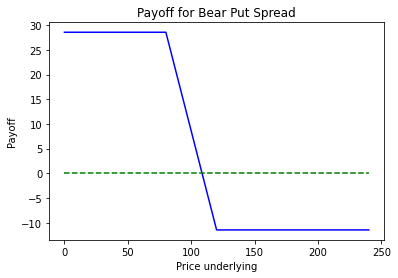

''

In [6]:
put_higher_strike = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE + 20, vol=VOL, rf=RF, T=T)
put_lower_strike = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE - 20, vol=VOL, rf=RF, T=T)
Payoff.show_payoff("Bear Put Spread", [put_higher_strike, -put_lower_strike])

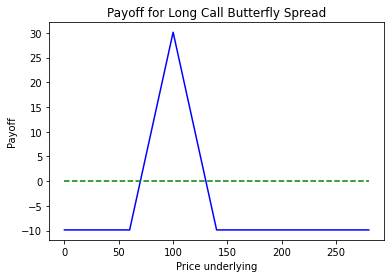

''

In [7]:
call_in_the_money = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE - 40, vol=VOL, rf=RF, T=T)
call_at_the_money = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE, vol=VOL, rf=RF, T=T)
call_out_of_the_money = option("put", asset_price=CURRENT_PRICE, strike=CURRENT_PRICE + 40, vol=VOL, rf=RF, T=T)
Payoff.show_payoff("Long Call Butterfly Spread", [call_in_the_money, -call_at_the_money, -call_at_the_money, call_out_of_the_money])
